In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,cohen_kappa_score
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import pylab as pl
pd.options.display.max_rows=None
pd.options.display.max_columns=None
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_excel('/content/drive/My Drive/Capstone/transformed_df.xlsx')

KeyboardInterrupt: ignored

In [ ]:
df1.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Year,Month
0,343481,NaN,NaN,71.310442,16000,16000.0,36 months,2.794780,18.386629,D,D2,Manager,10+ years,RENT,76.282376,Source Verified,2018-04-01,0,n,NaN,NaN,debt_consolidation,Debt consolidation,482xx,MI,12.97,1,Sep-2006,1,20.0,NaN,3.493362,0,21.086054,4.0,5.252012,w,77.234847,12782.62,15.828322,5222.14,12.196131,28.918987,0.0,0.0,0.0,Feb-2019,4.563472,Mar-2019,Feb-2019,1,20.0,1,Joint App,155000.0,25.71,Source Verified,0,0,43.413863,3,1,2,3,2.0,65.932533,100.0,1,5,22.451932,51.0,37.714065,2,4,2,3.085858,7084.0,10763.0,7.2,0,0,137.0,14.460281,1.077967,1.068123,2,2.0,NaN,2.0,NaN,1,1.567930,2.060831,1.513386,2.028252,2.539273,2.900628,3.205608,2.088951,3.487390,0.0,0,1,1.427368,96.0,0.0,0,0,35.191359,54.301766,60.262431,90.793486,38618.0,Mar-2007,1.0,1.0,20.0,52.2,5.0,16.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,4
1,343482,NaN,NaN,87.134314,28675,28675.0,60 months,3.107894,21.092636,E,E5,officer,10+ years,MORTGAGE,74.441265,Verified,2018-04-01,0,n,NaN,NaN,debt_consolidation,Debt consolidation,114xx,NY,17.00,0,Jul-2005,1,NaN,NaN,4.147580,0,54.144615,69.4,7.973929,w,100.229002,26107.93,17.444102,8674.05,11.711664,41.597367,0.0,0.0,0.0,Feb-2019,4.757724,Mar-2019,Feb-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,61.236392,1,15,0,0,36.0,112.009436,116.0,2,4,82.265507,105.0,40.381219,0,1,1,1.969564,23197.0,6014.0,79.5,0,0,153.0,13.939855,1.077967,1.068123,2,2.0,NaN,0.0,NaN,0,1.857586,2.447468,1.782384,2.954972,5.117636,2.296616,3.286357,2.486553,4.139374,0.0,0,0,1.124303,100.0,75.0,0,0,45.366029,91.225286,82.316757,156.824990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
df1.isnull().sum()

Unnamed: 0                                         0
id                                            150792
member_id                                     150792
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      13107
emp_length                                     12866
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                    

In [ ]:
df1.shape

(150792, 148)

In [ ]:
#transformed_df is the df where only the transformation of data has happened but no null value imputations are done 

In [ ]:
df2 = pd.read_excel('/content/drive/My Drive/Capstone/cleaned_data_1.xlsx')

In [ ]:
df2.head(2)

,Unnamed: 0,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Year,Month
0,0,343481,NaN,NaN,70.620133,16000,16000.0,36 months,2.794780,18.386629,D,D2,Manager,10+ years,RENT,76.282376,Source Verified,2018-04-01,0,n,NaN,NaN,debt_consolidation,Debt consolidation,482xx,MI,12.97,1,Sep-2006,1,1.87944e+10,0,3.493362,0,21.086054,4.0,5.252012,w,77.234847,12782.62,15.828322,5222.14,12.196131,28.918987,0.0,0.0,0.0,Feb-2019,4.563472,Mar-2019,Feb-2019,1,20.0,1,Joint App,155000.0,25.71,Source Verified,0,0,43.413863,3,1,2,3,1300.78,65.932533,1.129510e+16,1,5,22.451932,4.07587e+13,37.714065,2,4,2,3.085858,49273028934626268113707881988096,1703867323658118946199244072026112,6.515716e+06,0,0,158983967805203104,14.460281,1.077967,1.068123,2,1300.78,NaN,2.0,NaN,1,1.567930,2.060831,1.513386,2.028252,2.539273,2.900628,3.205608,2.088951,3.487390,0.0,0,1,1.427368,8.020604e+15,0.000000e+00,0,0,35.191359,54.301766,60.262431,90.793486,38618,Mar-2007,1,1,20,52.2,5,16,0,0,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,4
1,1,343482,NaN,NaN,86.243282,28675,28675.0,60 months,3.107894,21.092636,E,E5,officer,10+ years,MORTGAGE,74.441265,Verified,2018-04-01,0,n,NaN,NaN,debt_consolidation,Debt consolidation,114xx,NY,17.00,0,Jul-2005,1,,0,4.147580,0,54.144615,69.4,7.973929,w,100.229002,26107.93,17.444102,8674.05,11.711664,41.597367,0.0,0.0,0.0,Feb-2019,4.757724,Mar-2019,Feb-2019,0,NaN,1,Individual,0.0,0.00,0,0,0,61.236392,1,15,0,0,2.28047e+12,112.009436,3.926075e+16,2,4,82.265507,17008790884854130,40.381219,0,1,1,1.969564,1139454479012453000407567897542524928,12308485744269720382108336128000,1.652603e+15,0,0,402698237490851968,13.939855,1.077967,1.068123,2,1300.78,NaN,0.0,NaN,0,1.857586,2.44746

In [ ]:
df2.isnull().sum()

Unnamed: 0                                         0
Unnamed: 0.1                                       0
id                                            150792
member_id                                     150792
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      13107
emp_length                                     12866
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                   

In [ ]:
df2.shape

(150792, 149)

In [ ]:
df3 = pd.read_csv('/content/drive/My Drive/Capstone/Final_Cleaned.csv')

In [ ]:
df3.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,Year,Month
0,0,0,343481,NaN,NaN,71.310442,16000,16000.0,36 months,2.794780,18.386629,D,D2,Manager,10+ years,RENT,76.282376,Source Verified,2018-04-01,0,n,NaN,NaN,debt_consolidation,Debt consolidation,482xx,MI,3.575261,1,Sep-2006,1,20.0,NaN,3.493362,0,21.086054,2.888863,5.252012,w,77.234847,12782.62,15.828322,5222.14,12.196131,28.918987,0.0,0.0,0.0,Feb-2019,4.563472,Mar-2019,Feb-2019,1,20.0,1,Joint App,155000.0,25.71,Source Verified,0,0,43.413863,3,1,2,3,1.054226,65.932533,111.115238,1,5,22.451932,49.177635,37.714065,2,4,2,3.085858,17.857692,30.442814,4.840865,0,0,76.777401,14.460281,1.077967,1.068123,2,1.082148,NaN,1.315541,NaN,1,1.567930,2.060831,1.513386,2.028252,2.539273,2.900628,3.205608,2.088951,3.487390,0.0,0,1,1.427368,5.435560e+21,0.000000,0,0,35.191359,54.301766,60.262431,90.793486,38618.0,Mar-2007,1.0,1.0,20.0,52.2,5.0,16.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2018,4
1,1,1,343482,NaN,NaN,87.134314,28675,28675.0,60 months,3.107894,21.092636,E,E5,officer,10+ years,MORTGAGE,74.441265,Verified,2018-04-01,0,n,NaN,NaN,debt_consolidation,Debt consolidation,114xx,NY,4.041209,0,Jul-2005,1,NaN,NaN,4.147580,0,54.144615,24.150069,7.973929,w,100.229002,26107.93,17.444102,8674.05,11.711664,41.597367,0.0,0.0,0.0,Feb-2019,4.757724,Mar-2019,Feb-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,61.236392,1,15,0,0,3.159992,112.009436,129.420802,2,4,82.265507,100.424977,40.381219,0,1,1,1.969564,22.452351,26.242790,29.974483,0,0,84.409140,13.939855,1.077967,1.068123,2,1.082148,NaN,0.000000,NaN,0,1.857586,2.447468,1.782384,2.954972,5.117636,2.296616,3.286357,2.486553,4.139374,0.0,0,0,1.12

In [ ]:
df3.isnull().sum()

Unnamed: 0                                         0
Unnamed: 0.1                                       0
Unnamed: 0.1.1                                     0
id                                            150792
member_id                                     150792
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      13107
emp_length                                     12866
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                       

In [ ]:
df3.shape

(150792, 150)

In [ ]:
df=df3[['Unnamed: 0.1.1',
'loan_amnt',
'term',
'int_rate',
'installment',
'sub_grade',
'home_ownership',
'annual_inc',
'verification_status',
'purpose',
'delinq_2yrs',
'open_acc',
'pub_rec',
'revol_bal',
'total_acc',
'initial_list_status',
'out_prncp',
'total_pymnt',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'last_pymnt_amnt',
'application_type',
'tot_coll_amt',
'tot_cur_bal',
'open_acc_6m',
'open_act_il',
'open_il_12m',
'open_il_24m',
'total_bal_il',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'total_rev_hi_lim',
'inq_fi',
'total_cu_tl',
'inq_last_12m',
'acc_open_past_24mths',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mort_acc',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_op_past_12m',
'pub_rec_bankruptcies',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit',
'disbursement_method',
'loan_status',
'il_util',
'mths_since_recent_inq',
'mths_since_rcnt_il',
'mo_sin_old_il_acct',
'bc_util',
'percent_bc_gt_75',
'bc_open_to_buy',
'mths_since_recent_bc',
'dti',
'revol_util',
'all_util',
'avg_cur_bal',
'pct_tl_nvr_dlq']]

In [ ]:
df.head(2)

,Unnamed: 0.1.1,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,delinq_2yrs,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,application_type,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,loan_status,il_util,mths_since_recent_inq,mths_since_rcnt_il,mo_sin_old_il_acct,bc_util,percent_bc_gt_75,bc_open_to_buy,mths_since_recent_bc,dti,revol_util,all_util,avg_cur_bal,pct_tl_nvr_dlq
0,343481,71.310442,36 months,2.794780,18.386629,D2,RENT,76.282376,Source Verified,debt_consolidation,1,3.493362,0,21.086054,5.252012,w,77.234847,15.828322,12.196131,28.918987,0.0,4.563472,Joint App,0,43.413863,3,1,2,3,65.932533,1,5,22.451932,37.714065,2,4,2,3.085858,14.460281,1.077967,1.068123,2,1,1.567930,2.060831,1.513386,2.028252,2.539273,2.900628,3.205608,2.088951,3.487390,1.427368,0,35.191359,54.301766,60.262431,90.793486,Cash,0,111.115238,1.315541,1.054226,76.777401,4.840865,0.000000,30.442814,1.082148,3.575261,2.888863,49.177635,17.857692,5.435560e+21
1,343482,87.134314,60 months,3.107894,21.092636,E5,MORTGAGE,74.441265,Verified,debt_consolidation,0,4.147580,0,54.144615,7.973929,w,100.229002,17.444102,11.711664,41.597367,0.0,4.757724,Individual,0,61.236392,1,15,0,0,112.009436,2,4,82.265507,40.381219,0,1,1,1.969564,13.939855,1.077967,1.068123,2,0,1.857586,2.447468,1.782384,2.954972,5.117636,2.296616,3.286357,2.486553,4.139374,1.124303,0,45.366029,91.225286,82.316757,156.824990,Cash,0,129.420802,0.000000,3.159992,84.409140,29.974483,6.091383,26.242790,1.082148,4.041209,24.150069,100.424977,22.452351,8.641666e+21


In [ ]:
df_c = df.copy(deep=True)

In [ ]:
df_c = df_c.rename({'Unnamed: 0.1.1':'ID'}, axis=1)

In [ ]:
df_c.head(2)

,ID,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,delinq_2yrs,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,application_type,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,loan_status,il_util,mths_since_recent_inq,mths_since_rcnt_il,mo_sin_old_il_acct,bc_util,percent_bc_gt_75,bc_open_to_buy,mths_since_recent_bc,dti,revol_util,all_util,avg_cur_bal,pct_tl_nvr_dlq
0,343481,71.310442,36 months,2.794780,18.386629,D2,RENT,76.282376,Source Verified,debt_consolidation,1,3.493362,0,21.086054,5.252012,w,77.234847,15.828322,12.196131,28.918987,0.0,4.563472,Joint App,0,43.413863,3,1,2,3,65.932533,1,5,22.451932,37.714065,2,4,2,3.085858,14.460281,1.077967,1.068123,2,1,1.567930,2.060831,1.513386,2.028252,2.539273,2.900628,3.205608,2.088951,3.487390,1.427368,0,35.191359,54.301766,60.262431,90.793486,Cash,0,111.115238,1.315541,1.054226,76.777401,4.840865,0.000000,30.442814,1.082148,3.575261,2.888863,49.177635,17.857692,5.435560e+21
1,343482,87.134314,60 months,3.107894,21.092636,E5,MORTGAGE,74.441265,Verified,debt_consolidation,0,4.147580,0,54.144615,7.973929,w,100.229002,17.444102,11.711664,41.597367,0.0,4.757724,Individual,0,61.236392,1,15,0,0,112.009436,2,4,82.265507,40.381219,0,1,1,1.969564,13.939855,1.077967,1.068123,2,0,1.857586,2.447468,1.782384,2.954972,5.117636,2.296616,3.286357,2.486553,4.139374,1.124303,0,45.366029,91.225286,82.316757,156.824990,Cash,0,129.420802,0.000000,3.159992,84.409140,29.974483,6.091383,26.242790,1.082148,4.041209,24.150069,100.424977,22.452351,8.641666e+21


In [ ]:
df_c = df_c.set_index('ID')

In [ ]:
df_c.head(2)

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,delinq_2yrs,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,application_type,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,loan_status,il_util,mths_since_recent_inq,mths_since_rcnt_il,mo_sin_old_il_acct,bc_util,percent_bc_gt_75,bc_open_to_buy,mths_since_recent_bc,dti,revol_util,all_util,avg_cur_bal,pct_tl_nvr_dlq
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
343481,71.310442,36 months,2.794780,18.386629,D2,RENT,76.282376,Source Verified,debt_consolidation,1,3.493362,0,21.086054,5.252012,w,77.234847,15.828322,12.196131,28.918987,0.0,4.563472,Joint App,0,43.413863,3,1,2,3,65.932533,1,5,22.451932,37.714065,2,4,2,3.085858,14.460281,1.077967,1.068123,2,1,1.567930,2.060831,1.513386,2.028252,2.539273,2.900628,3.205608,2.088951,3.487390,1.427368,0,35.191359,54.301766,60.262431,90.793486,Cash,0,111.115238,1.315541,1.054226,76.777401,4.840865,0.000000,30.442814,1.082148,3.575261,2.888863,49.177635,17.857692,5.435560e+21
343482,87.134314,60 months,3.107894,21.092636,E5,MORTGAGE,74.441265,Verified,debt_consolidation,0,4.147580,0,54.144615,7.973929,w,100.229002,17.444102,11.711664,41.597367,0.0,4.757724,Individual,0,61.236392,1,15,0,0,112.009436,2,4,82.265507,40.381219,0,1,1,1.969564,13.939855,1.077967,1.068123,2,0,1.857586,2.447468,1.782384,2.954972,5.117636,2.296616,3.286357,2.486553,4.139374,1.124303,0,45.366029,91.225286,82.316757,156.824990,Cash,0,129.420802,0.000000,3.159992,84.409140,29.974483,6.091383,26.242790,1.082148,4.041209,24.150069,100.424977,22.452351,8.641666e+21


In [ ]:
df_c.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
delinq_2yrs                   0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
last_pymnt_amnt               0
application_type              0
tot_coll_amt                  0
tot_cur_bal                   0
open_acc_6m                   0
open_act_il                   0
open_il_12m                   0
open_il_24m                   0
total_bal_il                  0
open_rv_12m                   0
open_rv_24m                   0
max_bal_

**Used Dataset: Final_Cleaned.csv; Imputation:Mean, Median, Mode; Base Model Building**

In [ ]:
df_c = pd.get_dummies(df_c,drop_first=True)

In [ ]:
df_c.shape

(150792, 119)

In [ ]:
df_c['loan_status'].value_counts()

0    141492
1      9300
Name: loan_status, dtype: int64

In [ ]:
X=df_c.drop('loan_status',axis=1)

In [ ]:
y = df_c[['loan_status']]

**Using statsmodels approach**

In [ ]:
Xc=sm.add_constant(X)
model = sm.Logit(y,X).fit()
model.summary()

         Current function value: 0.082867
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:               150792
Model:                          Logit   Df Residuals:                   150791
Method:                           MLE   Df Model:                            0
Date:                Sun, 15 Aug 2021   Pseudo R-squ.:                  0.6421
Time:                        14:59:25   Log-Likelihood:                -12496.
converged:                      False   LL-Null:                       -34916.
Covariance Type:            nonrobust   LLR p-value:                       nan
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
loan_amnt                              -0.0510      0.021     -2.490      0.013      -0.091      -0.011
int_rate                               -6.7573      0.669    -10.094      0.000      -8.069      -5.445
installment                             2.8855      0.095     30.476      0.000       2.700       3.071
annual_inc                             -0.0044      0.003     -1.773      0.076      -0.009       0.000
delinq_2yrs                             0.0135      0.025      0.549      0.583      -0.035       0.062
open_acc                               -0.3444      0.732     -0.471      0.638      -1.779       1.090
pub_rec                                 0.0796      0.037      2.152      0.031       0.007       0.152
revol_bal                              -0.0154      0.006     -2.435      0.015      -0.028      -0.003
total_acc                               0.1405      0.084      1.670      0.095      -0.024       0.305
out_prncp                              -0.1000      0.005    -20.181      0.000      -0.110      -0.090
total_pymnt                            -3.1077      0.117    -26.607      0.000      -3.337      -2.879
total_rec_prncp                        -1.2184      0.123     -9.899      0.000      -1.460      -0.977
total_rec_int                          -0.1672      0.014    -11.749      0.000      -0.195      -0.139
total_rec_late_fee                      0.0438      0.001     31.814      0.000       0.041       0.046
last_pymnt_amnt                         1.7357      0.177      9.784      0.000       1.388       2.083
tot_coll_amt                         5.232e-07    1.5e-06      0.349      0.727   -2.42e-06    3.46e-06
tot_cur_bal                            -0.0539      0.018     -3.010      0.003      -0.089      -0.019
open_acc_6m                             0.0718      0.025      2.879      0.004       0.023       0.121
open_act_il                            -0.0009      0.017     -0.053      0.958      -0.035       0.033
open_il_12m                             0.0095      0.045      0.209      0.834      -0.079       0.098
open_il_24m                            -0.0359      0.029     -1.243      0.214      -0.093       0.021
total_bal_il                            0.0123      0.006      2.161      0.031       0.001       0.023
open_rv_12m                            -0.0467      0.034     -1.375      0.169      -0.113       0.020
open_rv_24m                            -0.0355      0.022     -1.633      0.102      -0.078       0.007
max_bal_bc                              0.0010      0.002      0.430      0.667      -0.003       0.005
total_rev_hi_lim                        0.0411      0.012      3.556      0.000       0.018       0.064
inq_fi                                  0.0037      0.015      0.257      0.797      -0.025       0.032
total_cu_tl                            -0.0013      0.008     -0.170      0.865      -0.017       0.014
inq_last_12m     

**Model 1.1 - Logistic Regression**

In [ ]:
lr = LogisticRegression()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
lr.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(lr.score(Xtrain,ytrain))
print("Testing Accuracy")
print(lr.score(scaledXtest,ytest))
scoreslr = cross_val_score(lr, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoreslr))
predictedlr = lr.predict(scaledXtest)
print(confusion_matrix(ytest,predictedlr))
print(classification_report(ytest,predictedlr))

Training Accuracy
0.9380222445383406
Testing Accuracy
0.9780715327821743
Cross Validation Accuracy
0.9464293217147915
[[42418    62]
 [  930  1828]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     42480
           1       0.97      0.66      0.79      2758

    accuracy                           0.98     45238
   macro avg       0.97      0.83      0.89     45238
weighted avg       0.98      0.98      0.98     45238



**Model 1.2 - Decision Tree Classifier**

In [ ]:
dt = DecisionTreeClassifier()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
dt.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(dt.score(Xtrain,ytrain))
print("Testing Accuracy")
print(dt.score(scaledXtest,ytest))
scoresdt = cross_val_score(dt, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoresdt))
predicted_dt = dt.predict(scaledXtest)
print(confusion_matrix(ytest,predicted_dt))
print(classification_report(ytest,predicted_dt))

Training Accuracy
0.9374159198135551
Testing Accuracy
0.9622662363499712
Cross Validation Accuracy
0.8455739980336231
[[41537   943]
 [  764  1994]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     42480
           1       0.68      0.72      0.70      2758

    accuracy                           0.96     45238
   macro avg       0.83      0.85      0.84     45238
weighted avg       0.96      0.96      0.96     45238



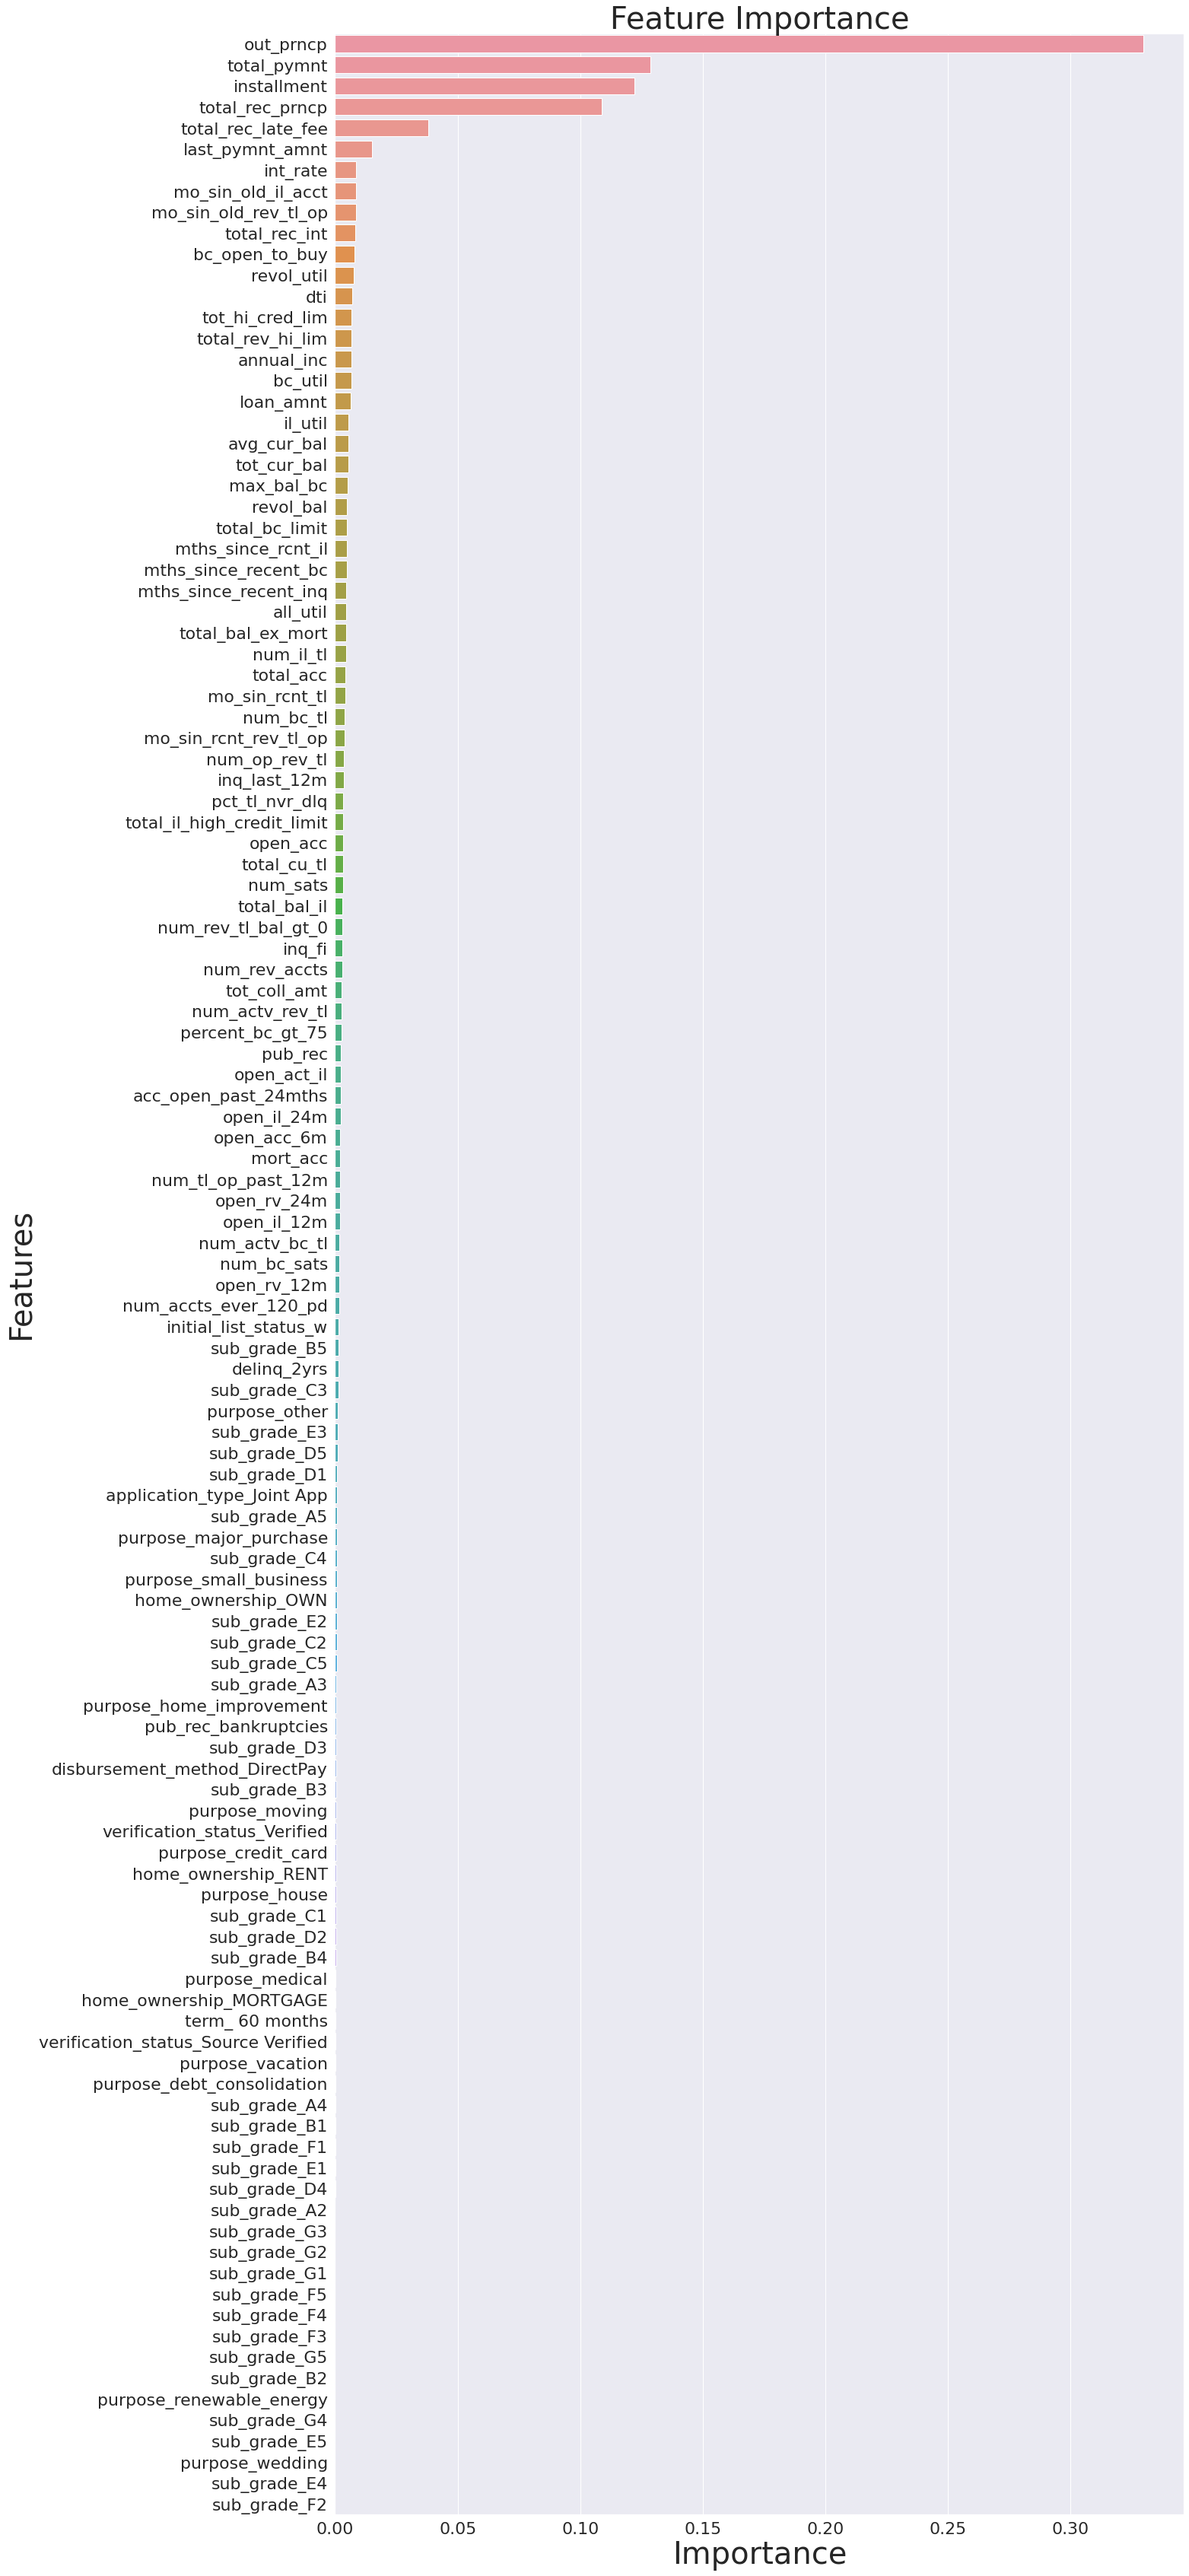

In [ ]:
important_features_dt = pd.DataFrame({'Features': X.columns, 
                                   'Importance': dt.feature_importances_})
important_features_dt = important_features_dt.sort_values('Importance', ascending = False)
sns.set(font_scale=2)
plt.figure(figsize=(20,60))
sns.barplot(x = 'Importance', y = 'Features', data = important_features_dt)
plt.title('Feature Importance', fontsize = 40)
plt.xlabel('Importance', fontsize = 40)
plt.ylabel('Features', fontsize = 40)
plt.show()

In [ ]:
important_features_dt['Importance_%'] = important_features_dt['Importance']*100

In [ ]:
important_features_dt

,Features,Importance,Importance_%
9,out_prncp,3.298172e-01,32.981724
10,total_pymnt,1.285521e-01,12.855208
2,installment,1.219898e-01,12.198979
11,total_rec_prncp,1.086255e-01,10.862552
13,total_rec_late_fee,3.811568e-02,3.811568
14,last_pymnt_amnt,1.506469e-02,1.506469
1,int_rate,8.674816e-03,0.867482
53,mo_sin_old_il_acct,8.606417e-03,0.860642
30,mo_sin_old_rev_tl_op,8.427710e-03,0.842771
12,total_rec_int,8.370888e-03,0.837089


In [ ]:
selected_features= ['out_prncp',
'total_pymnt',
'installment',
'total_rec_prncp',
'total_rec_late_fee',
'last_pymnt_amnt',
'int_rate',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'total_rec_int',
'bc_open_to_buy',
'revol_util',
'dti',
'tot_hi_cred_lim',
'total_rev_hi_lim',
'annual_inc',
'bc_util',
'loan_amnt',
'il_util',
'avg_cur_bal',
'tot_cur_bal',
'max_bal_bc',
'revol_bal',
'total_bc_limit',
'mths_since_rcnt_il',
'mths_since_recent_bc',
'mths_since_recent_inq',
'all_util',
'total_bal_ex_mort',
'num_il_tl',
'total_acc',
'mo_sin_rcnt_tl',
'num_bc_tl',
'mo_sin_rcnt_rev_tl_op',
'num_op_rev_tl',
'inq_last_12m',
'pct_tl_nvr_dlq',
'total_il_high_credit_limit',
'open_acc',
'total_cu_tl',
'num_sats',
'total_bal_il',
'num_rev_tl_bal_gt_0',
'inq_fi',
'num_rev_accts',
'tot_coll_amt',
'num_actv_rev_tl',
'percent_bc_gt_75',
'pub_rec',
'open_act_il',
'acc_open_past_24mths',
'open_il_24m',
'open_acc_6m',
'mort_acc',
'num_tl_op_past_12m',
'open_rv_24m',
'open_il_12m',
'num_actv_bc_tl',
'num_bc_sats',
'open_rv_12m',
'num_accts_ever_120_pd',
'initial_list_status_w',
'sub_grade_B5',
'delinq_2yrs',
'sub_grade_C3',
'purpose_other',
'sub_grade_E3']

In [ ]:
X=df_c[selected_features]

In [ ]:
y = df_c[['loan_status']]

In [ ]:
dt = DecisionTreeClassifier()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
dt.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(dt.score(Xtrain,ytrain))
print("Testing Accuracy")
print(dt.score(scaledXtest,ytest))
scoresdt = cross_val_score(dt, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoresdt))
predicted_dt = dt.predict(scaledXtest)
print(confusion_matrix(ytest,predicted_dt))
print(classification_report(ytest,predicted_dt))

Training Accuracy
0.9377096083521231
Testing Accuracy
0.9618462354657589
Cross Validation Accuracy
0.8482122556306686
[[41521   959]
 [  767  1991]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     42480
           1       0.67      0.72      0.70      2758

    accuracy                           0.96     45238
   macro avg       0.83      0.85      0.84     45238
weighted avg       0.96      0.96      0.96     45238



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
base=[('Decision Tree',DT),('Random Forest',RF)]
Voting_c=VotingClassifier(estimators=base,voting='hard')
Voting_model=Voting_c.fit(X_train,y_train)
print(accuracy_score(y_test,Voting_model.predict(X_test)))

In [ ]:
# As we have better recall score and a balance between the recall and precision we will select this model as our base model 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
dt = DecisionTreeClassifier(random_state = 10)
dt_grid = GridSearchCV(estimator = dt, 
                         param_grid = tuned_paramaters, 
                         cv = 10)
dt_model = dt_grid.fit(X_train, y_train)
print('Best parameters for decision tree classifier: ', dt_model.best_params_, '\n')

KeyboardInterrupt: ignored

**Model 1.3 - RandomForestClassifier**

In [ ]:
rf = RandomForestClassifier()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
rf.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(rf.score(Xtrain,ytrain))
print("Testing Accuracy")
print(rf.score(scaledXtest,ytest))
scoresrf = cross_val_score(rf, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoresrf))
predicted_rf = rf.predict(scaledXtest)
print(confusion_matrix(ytest,predicted_rf))
print(classification_report(ytest,predicted_rf))

Training Accuracy
0.9373496030467817
Testing Accuracy
0.9716609929705116
Cross Validation Accuracy
0.9314914510478346
[[42473     7]
 [ 1275  1483]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     42480
           1       1.00      0.54      0.70      2758

    accuracy                           0.97     45238
   macro avg       0.98      0.77      0.84     45238
weighted avg       0.97      0.97      0.97     45238



**Model 1.4- Naive Bayes Theorem**

In [ ]:
gnb = GaussianNB()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
gnb.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(gnb.score(Xtrain,ytrain))
print("Testing Accuracy")
print(gnb.score(scaledXtest,ytest))
scoresgnb = cross_val_score(gnb, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoresgnb))
predicted_gnb = gnb.predict(scaledXtest)
print(confusion_matrix(ytest,predicted_gnb))
print(classification_report(ytest,predicted_gnb))

Training Accuracy
0.06199670310930898
Testing Accuracy
0.1136212918342986
Cross Validation Accuracy
0.7153985987910608
[[ 2407 40073]
 [   25  2733]]
              precision    recall  f1-score   support

           0       0.99      0.06      0.11     42480
           1       0.06      0.99      0.12      2758

    accuracy                           0.11     45238
   macro avg       0.53      0.52      0.11     45238
weighted avg       0.93      0.11      0.11     45238



**Model 1.5- KNN CLassifier**

In [ ]:
knn = KNeighborsClassifier()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
knn.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(knn.score(Xtrain,ytrain))
print("Testing Accuracy")
print(knn.score(scaledXtest,ytest))
scoresknn = cross_val_score(knn, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoresknn))
predicted_knn = knn.predict(scaledXtest)
print(confusion_matrix(ytest,predicted_knn))
print(classification_report(ytest,predicted_knn))

Training Accuracy
0.9380222445383406
Testing Accuracy
0.9406693487775764
Cross Validation Accuracy
0.6557512780918435
[[42374   106]
 [ 2578   180]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     42480
           1       0.63      0.07      0.12      2758

    accuracy                           0.94     45238
   macro avg       0.79      0.53      0.54     45238
weighted avg       0.92      0.94      0.92     45238



**Model 1.6- GradientBoosting Classifier**

In [ ]:
gbc = GradientBoostingClassifier()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
gbc.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(gbc.score(Xtrain,ytrain))
print("Testing Accuracy")
print(gbc.score(scaledXtest,ytest))
scoresgbc = cross_val_score(gbc, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoresgbc))
predicted_gbc = gbc.predict(scaledXtest)
print(confusion_matrix(ytest,predicted_gbc))
print(classification_report(ytest,predicted_gbc))

**Model 1.7 - AdaBoostClassifer**

In [ ]:
ad = AdaBoostClassifier()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
ad.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(ad.score(Xtrain,ytrain))
print("Testing Accuracy")
print(ad.score(scaledXtest,ytest))
scoresgad = cross_val_score(ad, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoresad))
predicted_ad = ad.predict(scaledXtest)
print(confusion_matrix(ytest,predicted_ad))
print(classification_report(ytest,predicted_ad))

**Model 1.8 - XGBoostClassifier**

In [ ]:
xgb = XGBClassifier()
sc = StandardScaler()
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .30,random_state=10)
scaledXtrain = sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
xgb.fit(scaledXtrain,ytrain)
print("Training Accuracy")
print(xgb.score(Xtrain,ytrain))
print("Testing Accuracy")
print(xgb.score(scaledXtest,ytest))
scoresxgb = cross_val_score(xgb, scaledXtrain,ytrain, cv=10, scoring='roc_auc')
print("Cross Validation Accuracy")
print(np.mean(scoresxgb))
predicted_xgb = xgb.predict(scaledXtest)
print(confusion_matrix(ytest,predicted_xgb))
print(classification_report(ytest,predicted_xgb))

In [ ]:
y.isnull().sum()

loan_status    0
dtype: int64

**Using Sampling Techniques**

In [ ]:
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30,random_state=10)
X_train = sc.fit_transform(Xtrain)
X_test = sc.transform(Xtest)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30,random_state=10)

In [ ]:
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)

In [ ]:
y_train.head(2)

,loan_status
ID,
417832,0
370588,0


In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)
X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

In [ ]:
print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (105554, 118) (105554, 1)
Upsampled shape: (211108, 118) (211108, 1)
SMOTE sample shape: (198024, 118) (198024,)
Downsampled shape: (211108, 118) (211108, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [ ]:
x_train_sm

array([[74.26370492,  2.93699789, 17.39464927, ...,  1.        ,
         0.        ,  0.        ],
       [78.30686103,  3.10789403, 18.97759144, ...,  0.        ,
         0.        ,  0.        ],
       [69.74036634,  2.86258347, 16.10577429, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [72.4671741 ,  2.79973175, 17.34235205, ...,  0.52644233,
         0.52644233,  0.        ],
       [54.47890834,  2.67641676, 13.81516124, ...,  1.        ,
         0.        ,  0.        ],
       [60.53976178,  2.31448203, 14.98848841, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
X_train_u

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
X_train_d

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "Downsampled": (X_train_d, y_train_d),
                "SMOTE":(x_train_sm, y_train_sm)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(DecisionTreeClassifier(), 
                                 methods_data[method][0], 
                                 methods_data[method][1], 
                                 cv=5, 
                                 scoring='roc_auc')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())


The best F1 Score for Original data:
0.8480431226784694


ValueError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score


In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train_sm,y_train_sm)
dt_result = cross_val_score(dt, x_train_sm, y_train_sm, cv=5, scoring='recall')
print(dt_result.mean())
print ("\n\n ---Decision t Model---")
dt_auc = roc_auc_score(y_test, dt.predict(X_test))
print ("Decision Tree Classifier AUC = %2.2f" % dt_auc)
print(classification_report(y_test, dt.predict(X_test)))

0.9623172406368571


 ---Gradient Boosting Model---
Decision Tree Classifier AUC = 0.83
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     42480
           1       0.57      0.70      0.63      2758

    accuracy                           0.95     45238
   macro avg       0.78      0.83      0.80     45238
weighted avg       0.96      0.95      0.95     45238



In [ ]:
predicted_dt = dt.predict(X_test)
print(confusion_matrix(y_test,predicted_dt))

[[41024  1456]
 [  821  1937]]


In [ ]:
df_c.head(2)

,loan_amnt,int_rate,installment,annual_inc,delinq_2yrs,open_acc,pub_rec,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status,il_util,mths_since_recent_inq,mths_since_rcnt_il,mo_sin_old_il_acct,bc_util,percent_bc_gt_75,bc_open_to_buy,mths_since_recent_bc,dti,revol_util,all_util,avg_cur_bal,pct_tl_nvr_dlq,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,disbursement_method_DirectPay
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
343481,71.310442,2.794780,18.386629,76.282376,1,3.493362,0,21.086054,5.252012,77.234847,15.828322,12.196131,28.918987,0.0,4.563472,0,43.413863,3,1,2,3,65.932533,1,5,22.451932,37.714065,2,4,2,3.085858,14.460281,1.077967,1.068123,2,1,1.567930,2.060831,1.513386,2.028252,2.539273,2.900628,3.205608,2.088951,3.487390,1.427368,0,35.191359,54.301766,60.262431,90.793486,0,111.115238,1.315541,1.054226,76.777401,4.840865,0.000000,30.442814,1.082148,3.575261,2.888863,49.177635,17.857692,5.435560e+21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
343482,87.134314,3.107894,21.092636,74.441265,0,4.147580,0,54.144615,7.973929,100.229002,17.444102,11.711664,41.597367,0.0,4.757724,0,61.236392,1,15,0,0,112.009436,2,4,82.265507,40.381219,0,1,1,1.969564,13.939855,1.077967,1.068123,2,0,1.857586,2.447468,1.782384,2.954972,5.117636,2.296616,3.286357,2.486553,4.139374,1.124303,0,45.366029,91.225286,82.316757,156.824990,0,129.420802,0.000000,3.159992,84.409140,29.974483,6.091383,26.242790,1.082148,4.041209,24.150069,100.424977,22.452351,8.641666e+21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y = df_c[['loan_status']]

In [ ]:
df_c = df_c.drop('loan_status', axis =1)

In [ ]:
df_c['loan_status'] = y

In [ ]:
df_c.head(2)

,loan_amnt,int_rate,installment,annual_inc,delinq_2yrs,open_acc,pub_rec,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_op_past_12m,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,il_util,mths_since_recent_inq,mths_since_rcnt_il,mo_sin_old_il_acct,bc_util,percent_bc_gt_75,bc_open_to_buy,mths_since_recent_bc,dti,revol_util,all_util,avg_cur_bal,pct_tl_nvr_dlq,term_ 60 months,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,disbursement_method_DirectPay,loan_status
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
343481,71.310442,2.794780,18.386629,76.282376,1,3.493362,0,21.086054,5.252012,77.234847,15.828322,12.196131,28.918987,0.0,4.563472,0,43.413863,3,1,2,3,65.932533,1,5,22.451932,37.714065,2,4,2,3.085858,14.460281,1.077967,1.068123,2,1,1.567930,2.060831,1.513386,2.028252,2.539273,2.900628,3.205608,2.088951,3.487390,1.427368,0,35.191359,54.301766,60.262431,90.793486,111.115238,1.315541,1.054226,76.777401,4.840865,0.000000,30.442814,1.082148,3.575261,2.888863,49.177635,17.857692,5.435560e+21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
343482,87.134314,3.107894,21.092636,74.441265,0,4.147580,0,54.144615,7.973929,100.229002,17.444102,11.711664,41.597367,0.0,4.757724,0,61.236392,1,15,0,0,112.009436,2,4,82.265507,40.381219,0,1,1,1.969564,13.939855,1.077967,1.068123,2,0,1.857586,2.447468,1.782384,2.954972,5.117636,2.296616,3.286357,2.486553,4.139374,1.124303,0,45.366029,91.225286,82.316757,156.824990,129.420802,0.000000,3.159992,84.409140,29.974483,6.091383,26.242790,1.082148,4.041209,24.150069,100.424977,22.452351,8.641666e+21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot


values = df_c.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(df_c) * 0.50)
# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(values, n_samples=n_size)
	test = np.array([x for x in values if x.tolist() not in train.tolist()])
	# fit model
	model = DecisionTreeClassifier()
	model.fit(train[:,:-1], train[:,-1])
	# evaluate model
	predictions = model.predict(test[:,:-1])
	score = accuracy_score(test[:,-1], predictions)
	print(score)
	stats.append(score)
# plot scores
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))